#                                       | House Sales in Kingdoms |

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.



| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datasist.structdata import detect_outliers as do
sns.set()

In [2]:
df = pd.read_csv('House_Sales_in_King_Count_USA.csv')
pd.set_option('display.max_columns',None)

In [3]:
df.head()

,Unnamed: 0,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  float64
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.isna().sum()

Unnamed: 0       0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,3.671272e+05,0.926378,0.768818,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Cleaning

In [7]:
# Date 
df['date'] = pd.to_datetime(df['date'])

In [8]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [9]:
# MONTH
df['month'] = df['date'].dt.month

# getting the day 
df['day'] = df['date'].dt.day

# getting the year
df['year'] = df['date'].dt.year


# getting the quarter 
df['quarter'] = df['date'].dt.quarter

In [10]:
df.drop(columns=['Unnamed: 0','date'],inplace=True)

In [11]:
## Bathrom
df['bathrooms'] = df['bathrooms'].astype('int')

In [12]:
## Bedrooms Converet it to int 
df['bedrooms']  = df['bedrooms'].apply(lambda x : int(x))

In [13]:
## yr_built 
df['age'] = df['year']- df['yr_built']
# drop yr_built becuause we don't needed any more
df.drop(columns='yr_built',inplace=True)

In [14]:
## renuvated house
df['year'] - df['yr_renovated']

0        2014
1          23
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Length: 21613, dtype: int64

In [15]:
df.drop(columns='yr_renovated',inplace=True)

In [16]:
"""
I want to make a fucntion that return the index if the number of bathrooms is bigger than number of bedrooms
and then delete it because it's not normal to be the number of bathrooms are bigger than bedrooms,
we will use a list to assing the index of these values and then delete it 
"""
bath_room_index =[]
def num_bath(x,y):
    if y > x:
        return bath_room_index.append(y.index)
    else:return y

In [17]:
"""
is there a number of bathroom is are bigger than bedrooms , if there we need to delete them because in normal casses there is no house 
contain number of bathrooms bigger than bedrooms
"""
ind = df[df['bathrooms']>df['bedrooms']]
# drop rows that have bathrooms number is bigger than bedrooms
df.drop(ind.index,axis=0,inplace=True)

In [18]:
df[df['bathrooms']>df['bedrooms']]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month,day,year,quarter,age


In [19]:
df.select_dtypes('number').columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month', 'day', 'year', 'quarter', 'age'],
      dtype='object')

In [20]:
# rid from outliers 
idx = do(df,0,['price'])


In [21]:
df.drop(idx,inplace=True)


# Univariate Analysis

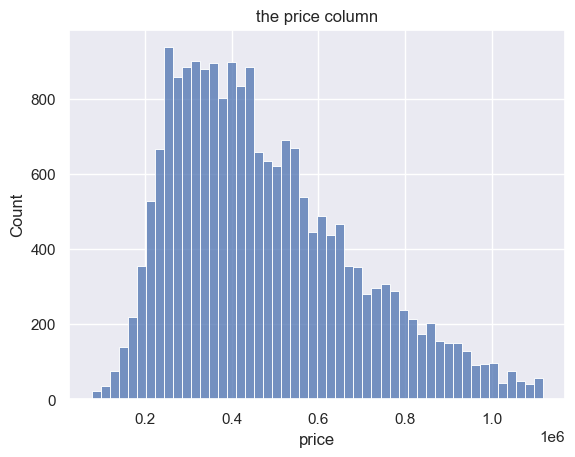

In [60]:
# price
sns.histplot(df['price'])
plt.title('the price column');

In [24]:
## bedrooms 
df['bedrooms'].value_counts()

3     9595
4     6298
2     2717
5     1332
6      225
1      183
7       30
8        9
9        4
10       2
11       1
33       1
Name: bedrooms, dtype: int64

In [25]:
ind = df[df['bedrooms']>=10].index

In [26]:
df.drop(ind,inplace=True)

In [27]:
ind

Int64Index([8757, 15161, 15870, 19254], dtype='int64')

- most of houses have 3 bedrooms or 4 bedrooms 

In [28]:
# bathrooms
df['bathrooms'].value_counts()

2    10162
1     8305
3     1693
4      145
0       76
5       10
6        1
7        1
Name: bathrooms, dtype: int64

In [29]:
inx = df[df['bathrooms']<1].index

In [30]:
df.drop(inx,inplace=True)

- each house has at least one or two bathroom 

In [31]:
### sqft_living 
df['floors'] = df['floors'].astype('int')

In [32]:
df['floors'].value_counts()

1    12186
2     7560
3      571
Name: floors, dtype: int64

In [33]:
### waterfront
df['waterfront'].value_counts()

0    20264
1       53
Name: waterfront, dtype: int64

- the majoraty of our data has no waterfront

In [34]:
### view : Has been viewed
df['view'].value_counts()

0    18764
2      796
3      343
1      274
4      140
Name: view, dtype: int64

- the biggest number of houses doesn


In [35]:
### condition :How good the condition is overall
df['condition'].value_counts()

3    13199
4     5381
5     1545
2      164
1       28
Name: condition, dtype: int64

In [36]:
### grade :overall grade given to the housing unit, based on King County grading system
df['grade'].value_counts()

7     8937
8     5926
9     2312
6     2007
10     759
5      227
11     129
4       15
12       4
1        1
Name: grade, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

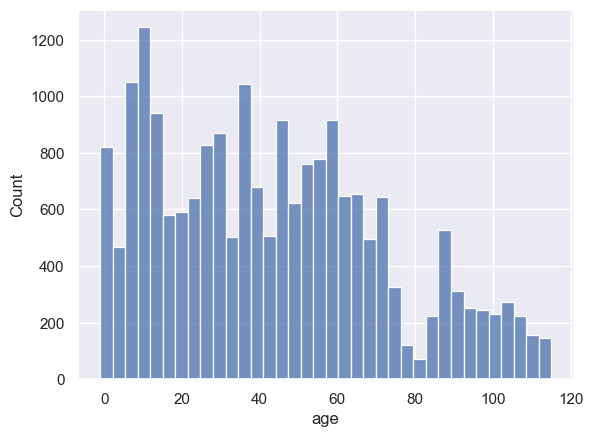

In [37]:
### the age of house
sns.histplot(x=df['age'])

In [38]:
df['lat'].unique()

array([47.5112, 47.721 , 47.7379, ..., 47.2815, 47.3906, 47.3339])

In [40]:
# df.drop(columns=[ 'zipcode', 'lat', 'long','sqft_living15', 'sqft_lot15','view','waterfront'],inplace=True)
df.drop(columns='zipcode',inplace=True)

In [41]:
df['month'].value_counts()

5     2254
4     2092
7     2075
6     2040
8     1837
3     1758
10    1756
9     1687
12    1382
11    1334
2     1185
1      917
Name: month, dtype: int64

- month of 1 is the lowest month in offer houses for saling

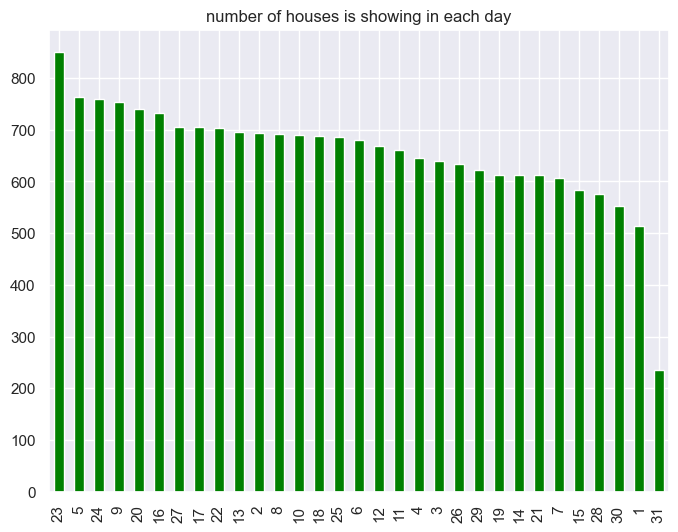

In [42]:
plt.figure(figsize=(8,6))
df['day'].value_counts().plot(kind='bar',color='green')

plt.title('number of houses is showing in each day');

In [43]:
df['quarter'].value_counts()

2    6386
3    5599
4    4472
1    3860
Name: quarter, dtype: int64

In [58]:
df['year'].value_counts(normalize=True)*100

2014    67.746222
2015    32.253778
Name: year, dtype: float64

In [56]:
# Just want to figure out if the number of month is equal in each year

for year in df['year'].unique():
    print(f"Year: {year}")
    for month in df[df['year'] == year]['month'].unique():
        print(f"Month: {month}")

Year: 2014
Month: 10
Month: 12
Month: 6
Month: 5
Month: 7
Month: 11
Month: 8
Month: 9
Year: 2015
Month: 2
Month: 1
Month: 4
Month: 3
Month: 5


In [46]:
df.to_csv('new.csv',index=False)